In [1]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imprts-85.data

# Linear regression machine learning moddel

In [2]:
# car price dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [19]:
car_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'])

In [20]:
car_df.head(2).transpose()

,0,1
symboling,3,3
normalized-losses,?,?
make,alfa-romero,alfa-romero
fuel-type,gas,gas
aspiration,std,std
num-of-doors,two,two
body-style,convertible,convertible
drive-wheels,rwd,rwd
engine-location,front,front
wheel-base,88.6,88.6


In [21]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [22]:
car_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [23]:
car_df= car_df.drop('make',axis=1)
# having different makers in one dataset may not be a good idea

In [24]:
car_df= car_df.drop('fuel-type',axis=1)
car_df= car_df.drop('engine-location',axis=1)
car_df= car_df.drop('num-of-doors',axis=1)
car_df= car_df.drop('drive-wheels',axis=1)
car_df= car_df.drop('body-style',axis=1)
car_df= car_df.drop('engine-size',axis=1)
car_df= car_df.drop('fuel-system',axis=1)
car_df= car_df.drop('aspiration',axis=1)
car_df= car_df.drop('normalized-losses',axis=1)

In [25]:
car_df.dtypes

symboling              int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [27]:
car_df['num-of-cylinders'] = car_df['num-of-cylinders'].replace({'one':1, 'two':2, 'three':3, 'four': 4, 'five': 5, 'six': 6, 'saven': 7, 'eight':8, 'nine':9, 'ten':10, 'eleven':11, 'twelve':12})

In [28]:
car_df['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [30]:
car_df.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-type', 'num-of-cylinders', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [31]:
car_df = car_df.replace('?',np.nan)

In [33]:
car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke'] = car_df['stroke'].astype('float64')
car_df['horsepower'] = car_df['horsepower'].astype('float64')
car_df['peak_rpm'] = car_df['peak-rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')

In [34]:
car_df['price'] = car_df['price'].fillna(car_df['price'].median())

In [36]:
car_df['bore'] = car_df['bore'].fillna(car_df['bore'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['cylinders'] = car_df['num-of-cylinders'].fillna(car_df['stroke'].median())

In [37]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-type        205 non-null    object 
 7   num-of-cylinders   205 non-null    int64  
 8   bore               205 non-null    float64
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    float64
 12  peak-rpm           203 non-null    object 
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              205 non-null    float64
 16  peak_rpm           205 non

In [39]:
car_df = car_df.drop(['peak-rpm','num-of-cylinders'],axis=1)

In [40]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-type        205 non-null    object 
 7   bore               205 non-null    float64
 8   stroke             205 non-null    float64
 9   compression-ratio  205 non-null    float64
 10  horsepower         205 non-null    float64
 11  city-mpg           205 non-null    int64  
 12  highway-mpg        205 non-null    int64  
 13  price              205 non-null    float64
 14  peak_rpm           205 non-null    float64
 15  cylinders          205 non-null    int64  
dtypes: float64(10), int64(5), 

In [41]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17
compression-ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00
horsepower,205.0,104.165854,39.529733,48.00,70.00,95.00,116.00,288.00


In [42]:
car_df.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-type,bore,stroke,compression-ratio,horsepower,city-mpg,highway-mpg,price,peak_rpm,cylinders
0,3,88.6,168.8,64.1,48.8,2548,dohc,3.47,2.68,9.0,111.0,21,27,13495.0,5000.0,4
1,3,88.6,168.8,64.1,48.8,2548,dohc,3.47,2.68,9.0,111.0,21,27,16500.0,5000.0,4
2,1,94.5,171.2,65.5,52.4,2823,ohcv,2.68,3.47,9.0,154.0,19,26,16500.0,5000.0,6
3,2,99.8,176.6,66.2,54.3,2337,ohc,3.19,3.40,10.0,102.0,24,30,13950.0,5500.0,4
4,2,99.4,176.6,66.4,54.3,2824,ohc,3.19,3.40,8.0,115.0,18,22,17450.0,5500.0,5


In [54]:
car_df['engine-type'] = car_df['engine-type'].replace({'dohc':1,'ohcv':2,'ohc':3,'l':4,'rotor':5,'ohcf':6,'dohcv':7})

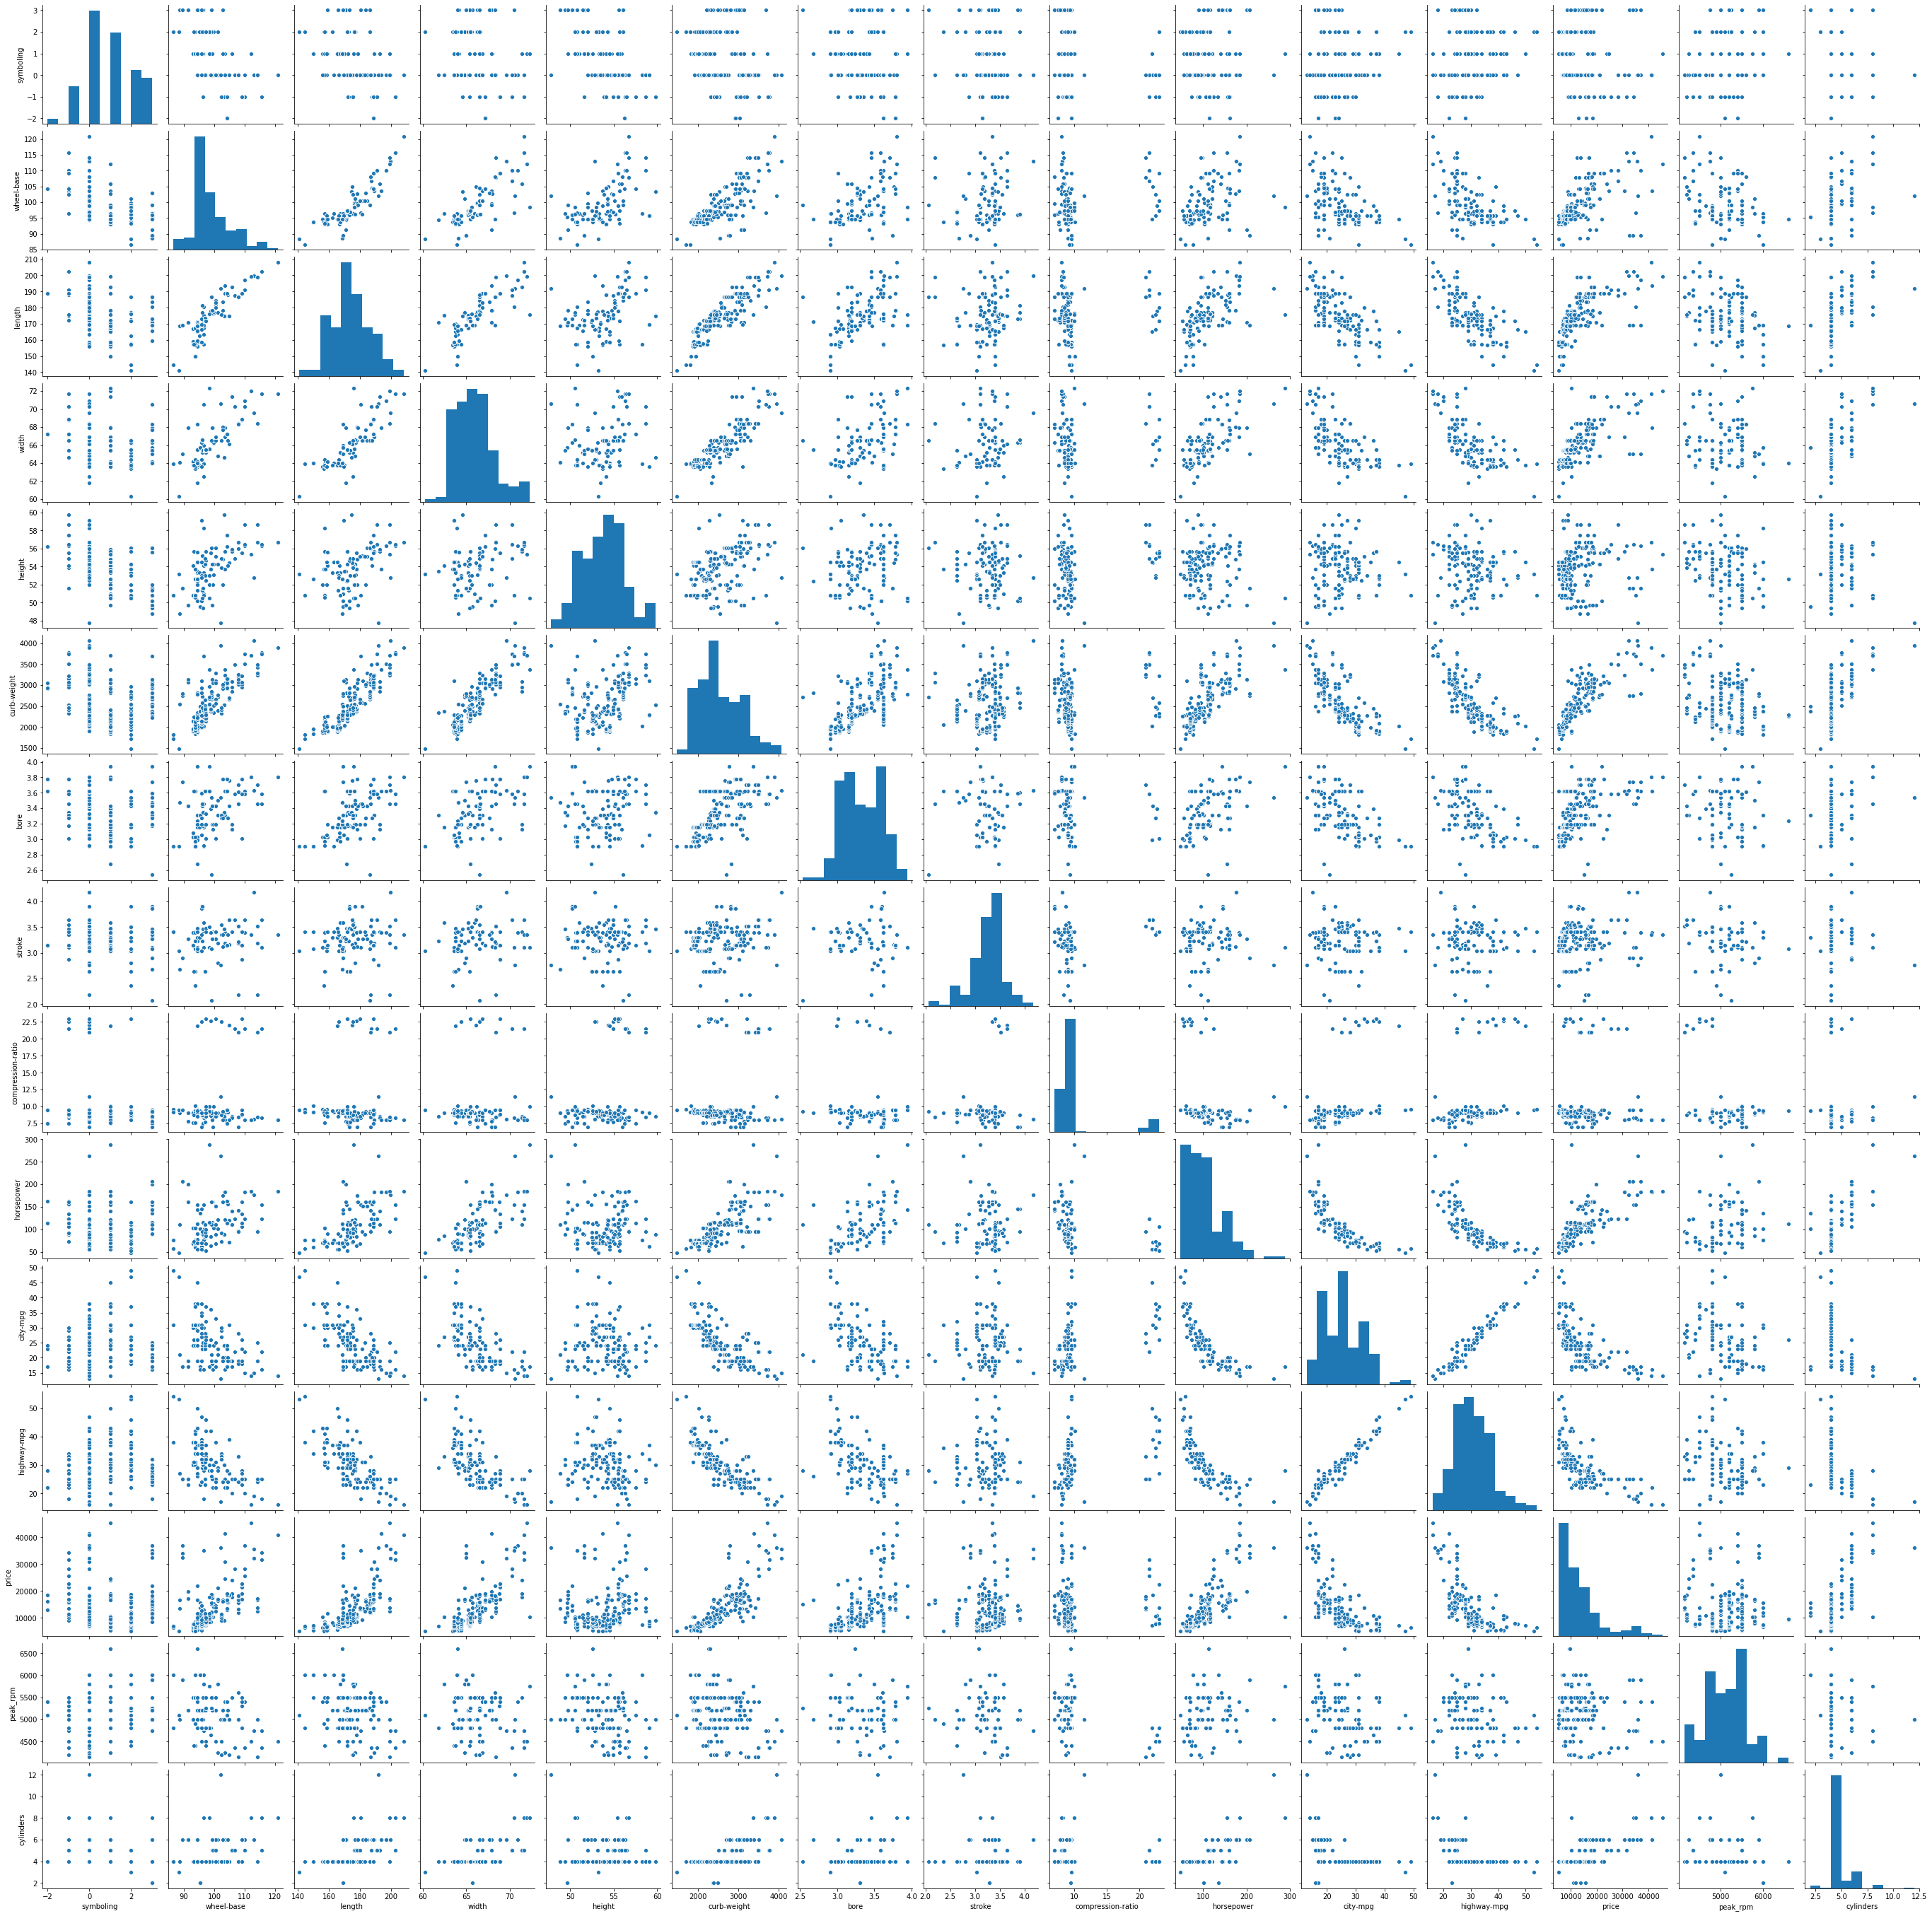

In [46]:
sns.pairplot(car_df)

In [55]:
X = car_df.drop('price',axis=1)

y = car_df['price']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [58]:
lm = LinearRegression()

In [60]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
prediction = lm.predict(X_test)

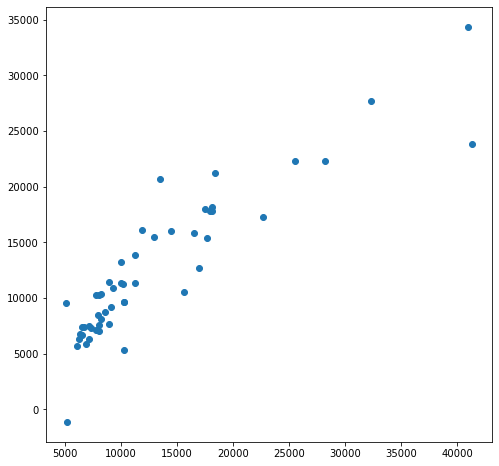

In [63]:
plt.figure(figsize=(8,8))

plt.scatter(y_test, prediction)

In [68]:
for idx, col in enumerate(X_train.columns):
    print(f'The coffiecent for {col} is {lm.coef_[idx]}')

# lm.coef_[0]

The coffiecent for symboling is 892.9275599403761
The coffiecent for wheel-base is 194.1222984899669
The coffiecent for length is -22.92899469489679
The coffiecent for width is -58.59511817722852
The coffiecent for height is 119.96736429002809
The coffiecent for curb-weight is 4.869752316796297
The coffiecent for engine-type is 8.366967294527297
The coffiecent for bore is 2883.8902982922623
The coffiecent for stroke is -401.17889776848557
The coffiecent for compression-ratio is 211.78909013861227
The coffiecent for horsepower is 12.41434036257771
The coffiecent for city-mpg is -113.00838623646551
The coffiecent for highway-mpg is -51.53836915607064
The coffiecent for peak_rpm is 1.3107229064116757
The coffiecent for cylinders is 2477.5535984624344


892.9275599403761

In [69]:
from sklearn import metrics

In [71]:
metrics.mean_squared_error(y_test, prediction)

13791091.085657086

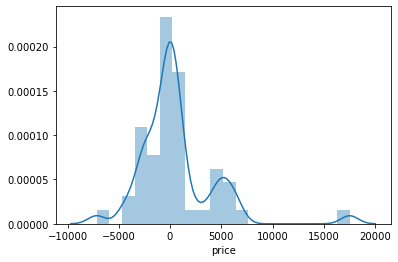

In [76]:
sns.distplot(y_test-prediction)

In [78]:
from sklearn.metrics import confusion_matrix

In [80]:
# we need to  re-lookin to this 